<a href="https://colab.research.google.com/github/GerardoMayel/diabetes_diagnosis/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [ ]:
df = pd.read_csv('diabetes_data.csv')

In [ ]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


# Exploratory Data Analysis:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
#Número de casos positivos y negativos
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

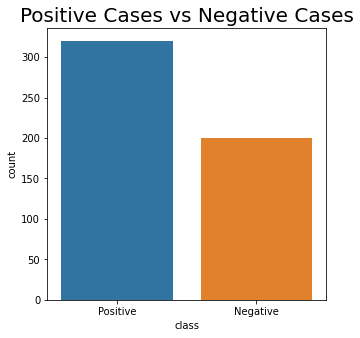

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Positive Cases vs Negative Cases', fontsize=20)
sns.countplot(data=df, x='class')

Text(0.5, 0, 'Gender')

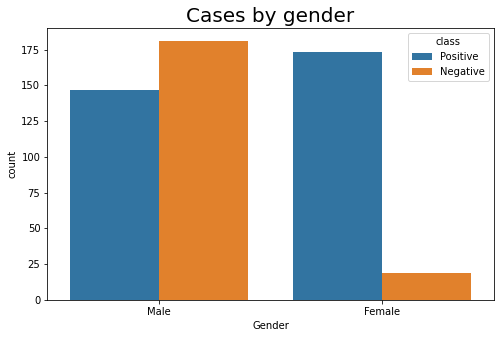

In [ ]:
#Casos por género
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='gender', hue='class')
plt.title('Cases by gender', fontsize=20)
plt.xlabel('Gender')

Text(0.5, 0, 'Age')

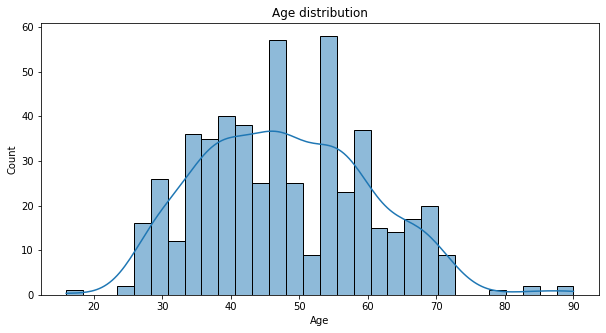

In [ ]:
#Distribución de la edad 
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age' , bins=30 , kde=True)
plt.title('Age distribution')
plt.xlabel('Age')

Text(0.5, 0, 'Age')

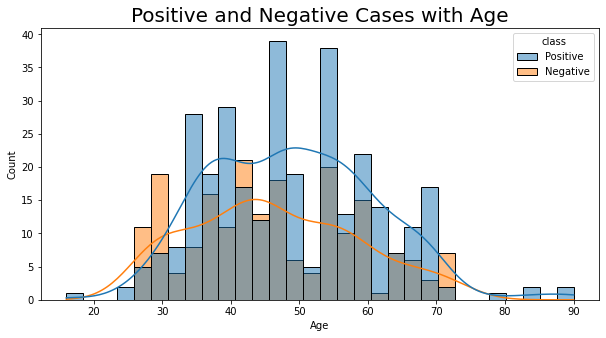

In [ ]:
#Casos positivos y negativos por edad
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age' , hue='class' , bins=30 , kde=True)
plt.title('Positive and Negative Cases with Age' , fontsize=20)
plt.xlabel('Age')

In [ ]:
#Mapeo de datos de la columna "class"
df['class']= df['class'].map({'Positive':'1',
                              'Negative':'0'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
df['class']=df['class'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
#Correlation
df.corr()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
polyuria,0.199781,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384
irritability,0.201625,0.237740,0.203446,0.140340,0.146698,0.239466,0.160551,0.077095,0.114006,1.000000,0.126877,0.151571,0.201637,0.043708,0.127801,0.299467


In [ ]:
corr_matrix= df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

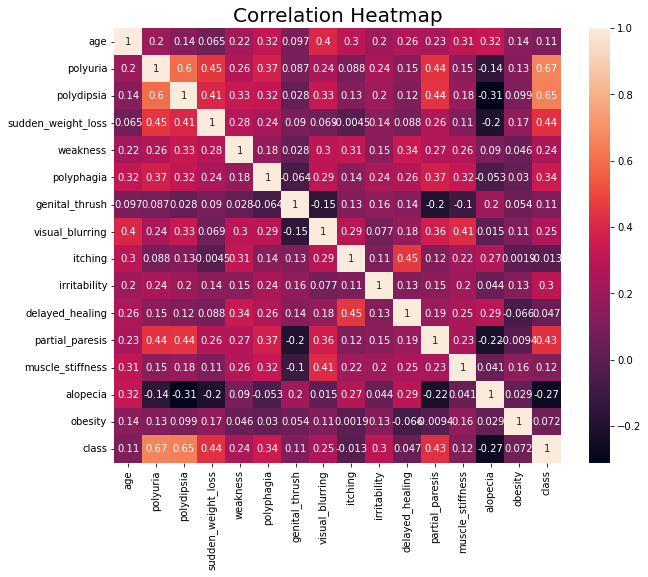

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap', fontsize=20)

In [ ]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [ ]:

df.corr()['class'].sort_values(ascending=False)

class                 1.000000
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching              -0.013384
alopecia             -0.267512
Name: class, dtype: float64

In [ ]:
df_dummy=pd.get_dummies(df['gender'])

In [ ]:
df=pd.concat([df, df_dummy], axis=1)

In [ ]:
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,Female,Male
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,0
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,1,0
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0


In [ ]:
df_dummy=df.drop(['gender'], axis=1)

In [ ]:
df_dummy

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,Female,Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,0
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,1,0
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0


In [ ]:
df=df.drop(['gender'], axis=1)


In [ ]:
df

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,Female,Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,0
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,1,0
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0


In [ ]:
import pylab
import scipy.stats as stats

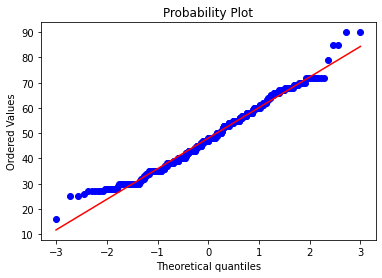

In [ ]:
#Gráfico Quantile-quantile para corroborar normalidad
stats.probplot(df_dummy['age'], dist='norm', plot=pylab)
pylab.show()

In [ ]:
#Prueba de normalidad (Test de Shapiro-Wilks)
from scipy.stats import shapiro
estadistico, p_value = shapiro(df['age'])
print('Estadístico=%.3f, p_value=%.3f' % (estadistico, p_value))

#p_value > 0.5 indica que la distribución es normal, por lo tanto no es normal.

Estadístico=0.983, p_value=0.000


In [ ]:
#Normalización de la edad (min-max)
df_n=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
df_n.describe()

count    520.000000
mean       0.432822
std        0.164209
min        0.000000
25%        0.310811
50%        0.425676
75%        0.554054
max        1.000000
Name: age, dtype: float64

In [ ]:
#Arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#X,y
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model= DecisionTreeClassifier(max_depth=3)

In [ ]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Precisión del modelo
model_accuracy = round(model.score(X, y), 4)
print('Accuracy: %0.4f' % (model_accuracy))

Accuracy: 0.9269


In [ ]:
#Visualización del modelo
from sklearn. tree import plot_tree

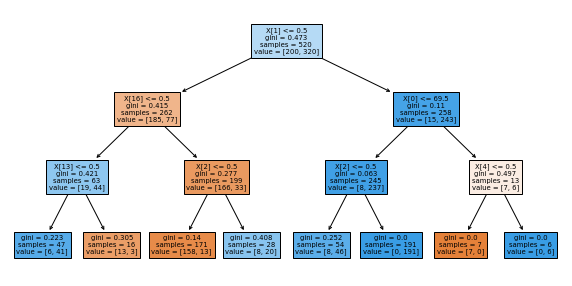

In [ ]:
plt.figure(figsize=(10,5))
plot_tree(decision_tree=model, filled=True);